# EP2 - MAC0209

* Bruna Thalenberg - 8569211
* Eduardo Freire - 10262627
* Erica Cope - 9299091
* Guilherme Yambanis - 8041265
* Nathan Benedetto Proença - 8941276

(Grupo Modeletes)

## Introdução

O presente estudo tem o objetivo de estudar o comportamento dos movimentos bidimensionais por meio de experimentos e simulações algorítmicas e da comparação de dados experimentais e simulados. Os movimentos escolhidos pelo grupo foram o Movimento Circular Uniforme (MCU), Movimento Uniformemente Variado (MUV) na forma de rolamento em plano inclinado, e Movimento Oscilatório, especificamente o movimento pendular. Foram utilizados os modelos clássicos que descrevem tais movimentos para as simulações, por meio de resolução analítica das equações.

In [1]:
import csv
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Métodos

### Experimentos
#### Movimento Circular Uniforme
Para o experimento de Movimento Circular Uniforme, utilizamo-nos de uma região da Praça do Relógio de Sol, na USP, que possui lajotas uniformes dispostas circularmente. As lajotas foram utilizadas para dimensionar os passos da pessoa realizando a travessia, que fez uso de um metrônomo a 80 bpm para realizar as passadas. Fixamos um raio $r$ de 4 metros e, no centro do círculo, fixamos um dispositivo composto de um canudo, uma pedra e barbante, para atuar como um compasso. O barbante, também de raio 4m, foi amarrado na perna de um dos integrantes do grupo, responsável por realizar o movimento, garantindo que se mantivesse no trajeto delimitado. 

O trajeto do movimento consistiu em uma volta ao longo do círculo, perfazendo $2 \pi r = 25.13$ metros, aproximadamente. Foram fixados quatro pontos de verificação do tempo, uniformemente espaçados ao longo do círculo, equidistantes de 90º ou, equivalentemente, a cada 6.28 metros, aproximadamente.

O tempo de travessia foi medido com o uso de cronômetros de aparelhos celulares e anotado manualmente em uma prancheta, para a posterior transposição para arquivos _csv_. Foi utilizado o acelerômetro de um celular Android, por meio do aplicativo _Physics Toolbox_, para obter dados adicionais a respeito da travessia. Esse celular foi operado pela pessoa que atravessava, com cinco segundos de período de estabilização inicial e final. 

#### Movimento Uniformemente Variado (Descida em Plano Inclinado)

Para o experimento de Movimento Uniformemente Variado, utilizou-se de uma rua inclinada, com inclinação aproximada de $3^o$ e um skate, garantindo a aceleração constante da gravidade. As travessias foram realizadas com o operador do celular sentado no skate. 

O trajeto foi de 20 metros e com o auxílio de fita métrica, foram realizadas marcações a cada 5 metros. Foram realizadas cinco travessias, com cronômetros alternados nas posições 5, 10, 15 e 20 metros. 

O tempo de travessia foi medido com o uso de cronômetros de aparelhos celulares e anotado manualmente em uma prancheta, para a posterior transposição para arquivos _csv_. Foi utilizado o acelerômetro de um celular Android, por meio do aplicativo _Physics Toolbox_, para obter dados adicionais a respeito da travessia. Esse celular foi operado pela pessoa que atravessava, com cinco segundos de período de estabilização inicial e final. 

#### Movimento Oscilatório (Pêndulo)

Utilizamos um pêndulo de madeira de 0.65 metros de raio, fixado em uma lixeira de concreto por meio de uma rosca de metal. Fixamos a altura inicial em 0.93 metros do solo, e verificamos que a altura mínima durante o movimento era de 0.3 metros.

Foi utilizado o acelerômetro de um celular Android, por meio do aplicativo _Physics Toolbox_, para obter os dados a respeito da travessia. Esse celular foi fixado por meio de elásticos na extremidade do pêndulo, com cinco segundos de período de estabilização inicial e final. Após certo período de oscilação, quando o movimento atingia amplitude muito baixa, a oscilação era interrompida e o celular era retornado para a posição inicial para os cinco segundos de estabilização.


### Simulações

A partir dos dados obtidos, foi calculada a velocidade média de cada travessia, a partir da soma do tempo total de cada iteração, dividida pela metragem total. A partir da velocidade média, foi calculado analiticamente o tempo decorrido do início até cada posição utilizando-se as equações da física newtoniana de cada movimento, respectivamente $ S = S_0 + vt$ e $ S = S_0 + v_0t + \alpha \frac{t^2}{2} $. Note que a velocidade inicial do MUV será sempre 0, uma vez que o movimento inicia-se do repouso. A posição inicial será também sempre 0, por convenção.

In [2]:
def prepara_figura(titulo, eixo_x, eixo_y):
    plt.figure(figsize=(10,10))
    plt.title(titulo)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    
def plota_set(nome, data):
    prepara_figura(nome, 'tempo (s)', 'aceleração (m/s^2)')
    plt.plot(data.time, data.gFy)
    plt.plot(data.time, data.gFx)
    plt.plot(data.time, data.gFz)
    plt.plot(data.time, data.TgF)
    
def plota_sobreposto(nome, lista_de_arquivos):
    prepara_figura(nome, 'tempo (s)', 'aceleração (m/s^2)')
    for arq in lista_de_arquivos:
        data = pd.read_csv(arq, sep= ",")
        plt.plot(data.time, data.gFy)
        plt.plot(data.time, data.gFx)
        plt.plot(data.time, data.gFz)
        plt.plot(data.time, data.TgF)

def ler_cron(arquivo_cron):
    t = []
    with open (arquivo_cron, "r") as f:
        rd = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for line in rd:
            t.append([0] + line)
    return t

def estima_ac(df):
    focus = (10 <= df.time) & (df.time <= 12)
    return np.mean(df[focus].TgF)

def mostra_ac(df, nome, a_ana = None):
    focus = (0 <= df.time)
    prepara_figura(nome, 'tempo (s)', 'aceleração (m/s^2)')
    times = df[focus].time
    plt.plot(times, df[focus].gFx)
    plt.plot(times, df[focus].gFy)
    plt.plot(times, df[focus].gFz)
    
    if(a_ana != None):
        plt.plot(times, times*0 + a_ana)
    else:
        plt.plot(times, estima_ac(df) * np.ones(times.shape))
    
    plt.legend(loc = 0)

In [3]:
def nextTmuv(x, a):
    """ nextTmu implementa o método analítico para calcular o tempo decorrido dado uma aceleração média.
    Assume velocidade inicial 0, uma vez que o fenômeno modelado utiliza-se apenas da aceleração fornecida
    pela gravidade a partir de um corpo parado.
        
    Parâmetros:
    -----------
    x: float - Posição atual
    a: float - Aceleração média do movimento
    
    Returns:
    --------
    t: float : tempo pra realizar o percurso
    
    """
    if a == 0:
        return 0
    return math.sqrt(2*x/a)

In [4]:
p2 = [0, 5, 10, 15, 20]

def plota_muv(arquivo_cron, df_acel):
    t = ler_cron(arquivo_cron)
    for i in range(5):
        # Calcula aceleração
        a = 40 / t[i][4]**2
        tAna = []
        poriginal= []
        for x in range (21):
            poriginal.append(x)
            tAna.append(nextTmuv(x, a))
    
        mostra_ac(df_acel[i], "Travessia {} - MUV: Acelerômetro".format(i+1))
    
        prepara_figura("Travessia {} - MUV".format(i+1),
                       "distância (m)", "tempo (s)")
        plt.plot(p2, t[i], 'co', linestyle = "", label = "Experimental")
        plt.plot(poriginal, tAna, 'k--', label = "Analítico")
        plt.legend(loc = 0)
        
        tAnaTrim = [tAna[0], tAna[5], tAna[10], tAna[15], tAna[20]]
        erro1 = [abs(x - y) for x, y in zip(t[i], tAnaTrim)]
        print("Módulo do erro máximo - x(t):", max(erro1))
        
def calcula_acel(iteracao, t):
    # calcula aceleração pseudo instantânea ao atingir cada marca
    acel = [0]
    for i in range(1, 5):
        alfa = (2*p2[i])/t[iteracao][i]**2
        acel.append(alfa)
    return acel

def calcula_vel(dv_dt, iteracao, t):
    # calcula a velocidade pseudo instantânea ao atingir cada marca
    vel = [[0], [0]]
    alfa = (2*p2[-1])/t[iteracao][-1]**2
    for i in range(1, 5):
        vel[0].append(alfa*t[iteracao][i])
        vel[1].append(math.sqrt(2*dv_dt*p2[i]))
    erro1 = [abs(x  - y) for x, y in zip(vel[0], vel[1])]
    print("Módulo do erro máximo - v(t):", max(erro1))
    return vel

def plota_acel(dv_dt, dv_dt_experim, iteracao, tempo):
    prepara_figura("Aceleração - MUV: experimento {}".format(iteracao+1), "tempo (s)", "aceleração (m/s^2)")
    plt.plot(tempo[iteracao], [dv_dt for i in range (5)], 'k--', label = "Analítico")
    plt.plot(tempo[iteracao], dv_dt_experim, 'co', linestyle = "", label = "Experimental")
    avg = sum(dv_dt_experim)/len(dv_dt_experim)
    plt.plot(tempo[iteracao], [avg for i in range (5)], 'b', label = "Experimental média")
    plt.legend(loc = 0)
    
def plota_vel(vel_experim, iteracao, tempo):
    prepara_figura("Velocidade - MUV: experimento {}".format(iteracao+1), "tempo (s)", "velocidade (m/s)")
    plt.plot(tempo[iteracao], vel_experim[1], 'k--', label = "Analítico")
    plt.plot(tempo[iteracao], vel_experim[0], 'co', linestyle = "", label = "Experimental")
    plt.legend(loc = 0)

In [5]:
#Simulacao do Movimento Harmonico Simples
# d2x / dt2 = - omega^2 x


def initState_SHO(x,v,t):
    S = np.array([x,v,t])
    return(S)

def nextState_SHO(S,dt):
    Sn = S + dt * rate(S,dt)
    return(Sn)

def rate_SHO(S,dt):
    omega = 0.05
    R = np.array([S[1], -omega*omega*S[0], 1])
    return(R)
    

def main_SHO():
    t=0
    tf = 100
    dt=0.1
    x=0.65
    v=0
    S = initState(x,v,dt)
    vve=[]
    vxe=[]
    while (S[2]<tf):
        vve.append(S[1])
        vxe.append(S[0])
        S = nextState(S,dt)
    

    pyplot.figure(0)
    pyplot.plot(vxe,label='Euler',linestyle='',marker='o') 
    pyplot.title('Position')
    pyplot.show(block=False)

    pyplot.figure(1)
    pyplot.plot(vve,label='Euler',linestyle='',marker='o')
    pyplot.title('Velocity')
    pyplot.show()

    
#Ignora o comeco do movimento, ve a primeira queda
def find_init(data):
    init = 0
    while data.TgF[init] < 2.9:
        init+=1
    return init

#Ignora o fim, ve o ultimo momento que o G e signifcantemente
# menor que 1
def find_end(data):
    end = data.TgF.size-1
    while data.TgF[end] > 0.6:
        end -= 1
    return end
    
    
#FUNCAO PARA ACHAR O PERIODO DO PENDULO    
def gets_period(data):    
    init = find_init(data)
    term = find_end(data)
    period = 0
    its = 1
    start = 0
    end = 0
    top = 0
    for i in range(init, term):
        if(data.TgF[i] > data.TgF[i+1] and data.TgF[i+1] < data.TgF[i+2]):
            if top == 0:
                start = data.time[i+1]
            elif top == 1: 
                end = data.time[i+1]
        elif(data.TgF[i] < data.TgF[i+1] and data.TgF[i+1] > data.TgF[i+2]):    
            if start != 0 and end==0:
                top+=1
            elif start!=0 and end!=0:
                top +=1
        if top==2 and start!= 0 and end != 0:
            period+= end-start
            its+=1
            start = 0
            end = 0
            top = 0
    period = period/its  
    return period

## Verificação do programa

In [6]:
# testando a função que calcula o tempo para o MUV
a = 10
r = []
s = [0, 5, 20, 45]
r_esperado = [0, 1, 2, 3]

for x in s:
    r.append(nextTmuv(x, a))
    
if r == r_esperado:
    print("O programa funciona fornece o resultado esperado.")
    
# teste de corner case
x = nextTmuv(0, 0)
if (x == 0):
    print("O programa funciona corretamente para caso extremo.")   

O programa funciona fornece o resultado esperado.
O programa funciona corretamente para caso extremo.


## Dados

### Movimento Circular Uniforme

(OBS: O DADO ANOTADO DO RAIO NÃO FAZ SENTIDO, TÁ ANOTADO COMO 65 CM. MEDI O BARBANTE E TEM UNS 4 METROS. SE OS DADOS ESTIVEREM MUITO DIFERENTES, ADAPTAR O RAIO LÁ NOS DADOS DOS EXPERIMENTOS)

Nos conjuntos de gráficos a seguir, exibimos os resultados das cinco travessias do movimento circular uniforme. Os dados experimentais são representados por pequenos círculos nas posições correspondentes às de cada cronômetro. No gráfico de cada travessia, apresentamos, também, na linha tracejada, o comportamento esperado do movimento uniforme, obtido de forma analítica. Na sequência, abaixo de cada gráfico, estão os dados obtidos a partir do acelerômetro do celular.

In [7]:
raw_mcu = ler_cron("data/MCU/MCU.csv")
radius = raw_mcu[0][1]
experiments = raw_mcu[2:]

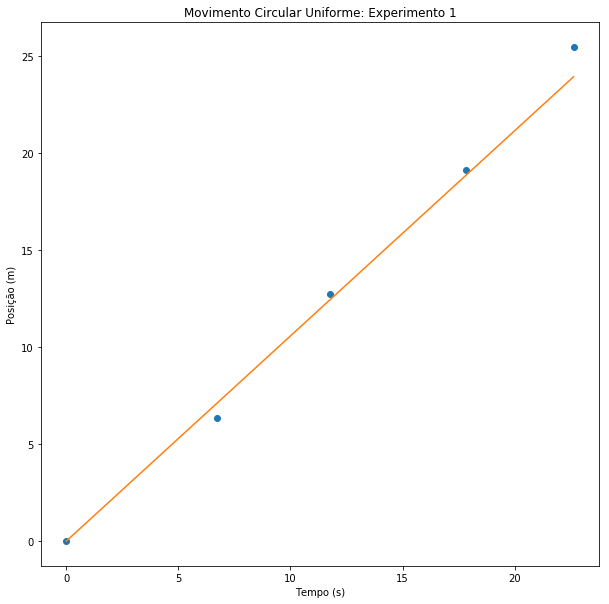

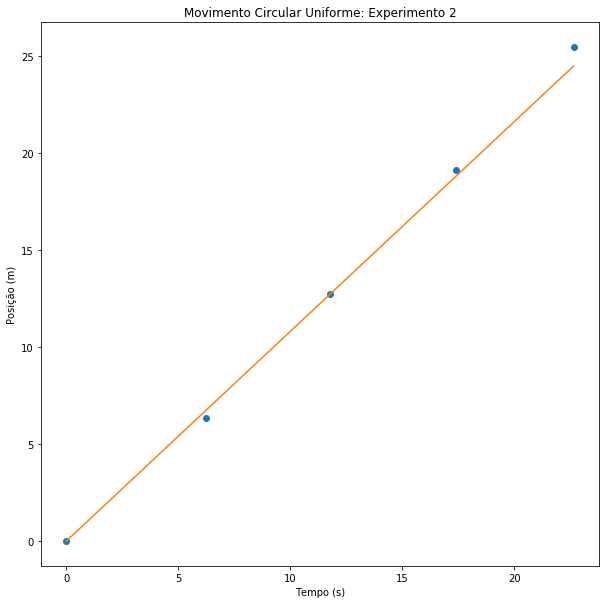

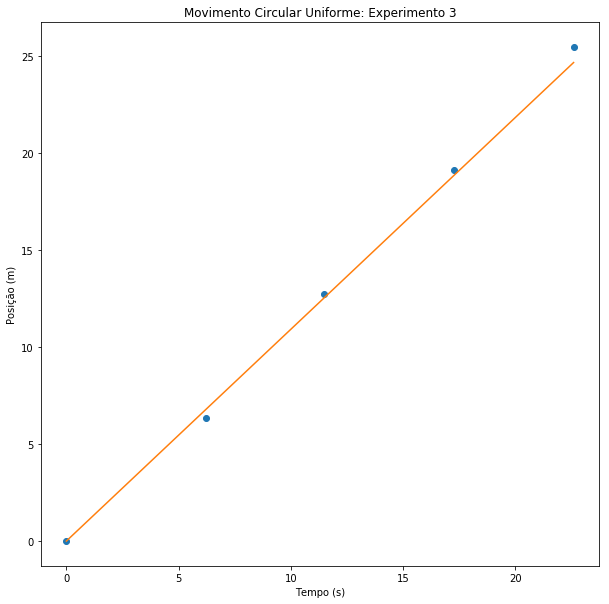

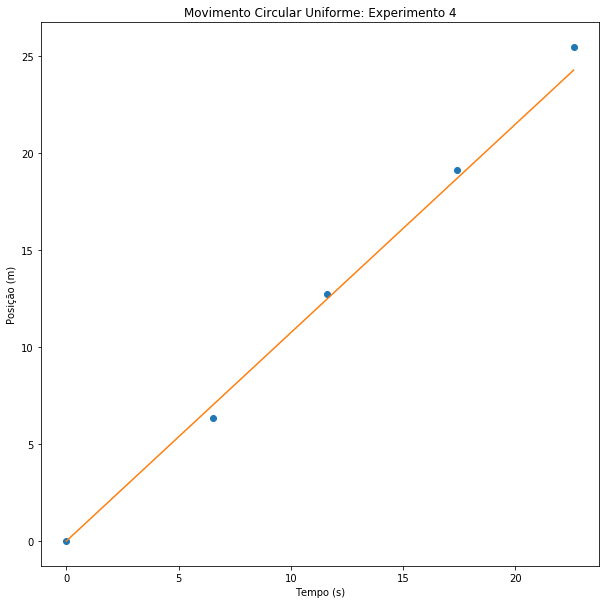

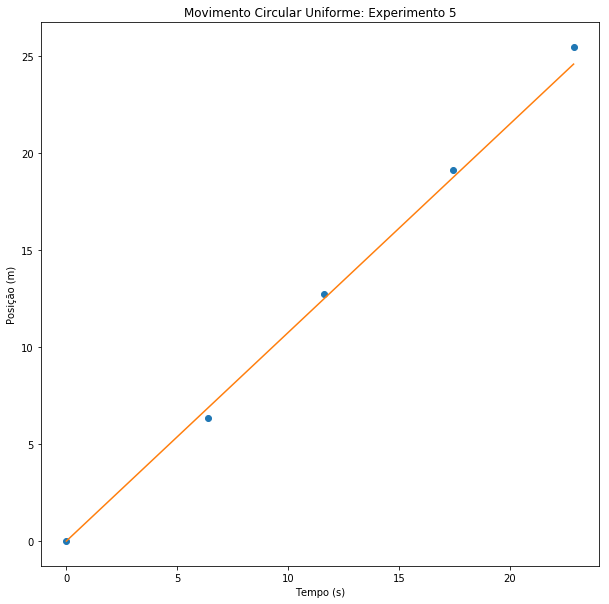

In [8]:
def calc_angular_vel(time_list):
    n = len(time_list) - 1
    cron = np.array(time_list[1:])
    return np.mean(np.linspace(1, n, n) * (np.pi / (2 * cron)))

for i, exp in enumerate(experiments):
    mean = calc_angular_vel(exp)
    t = np.array(exp)
    prepara_figura("Movimento Circular Uniforme: Experimento {}".format(i + 1) , 'Tempo (s)', 'Posição (m)')
    plt.plot(t, radius * np.linspace(0 , 2 * np.pi, 5), 'o')
    plt.plot(t, radius * mean * t)

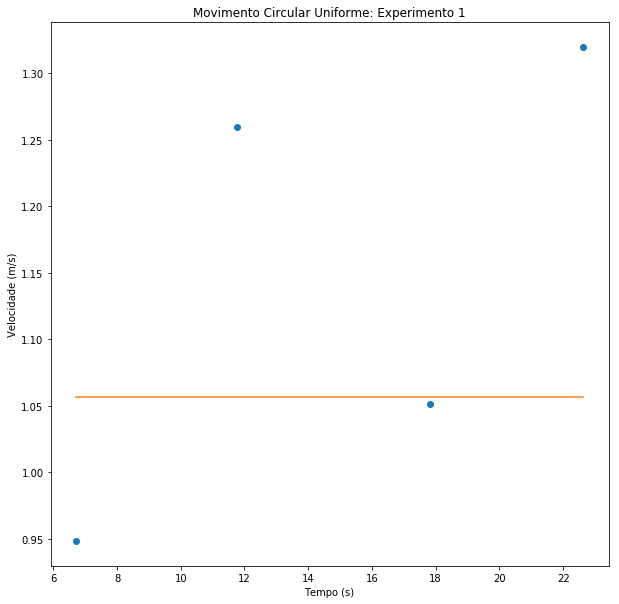

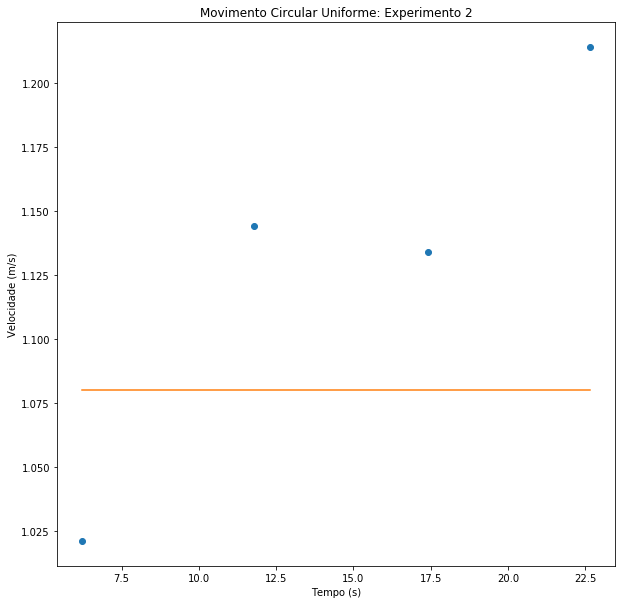

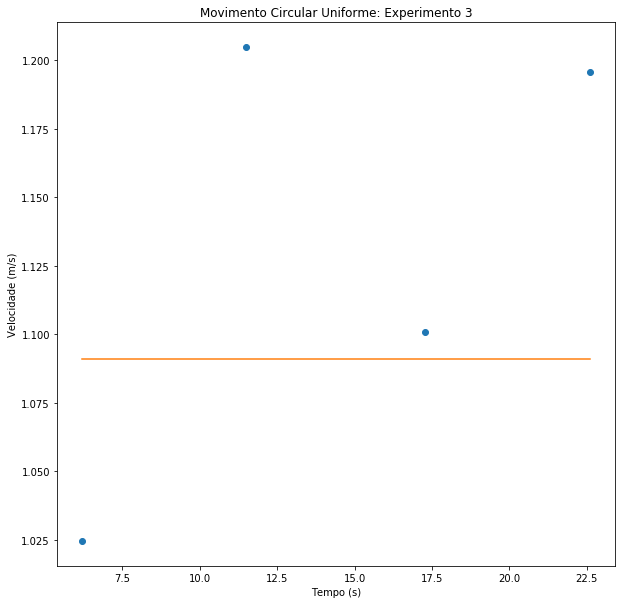

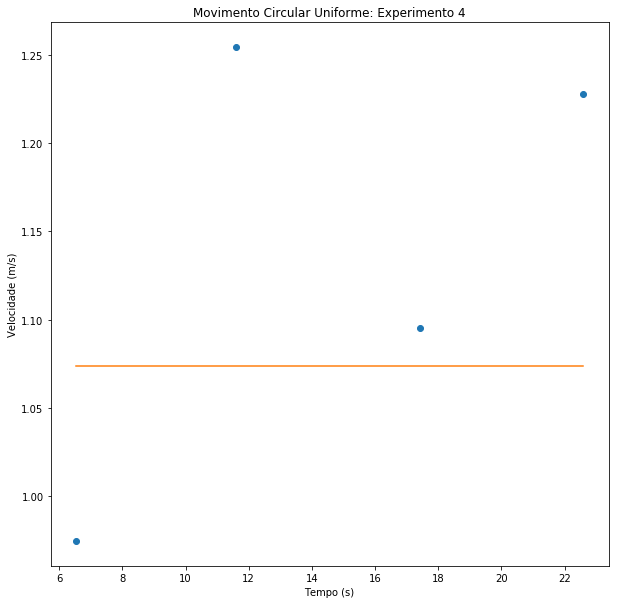

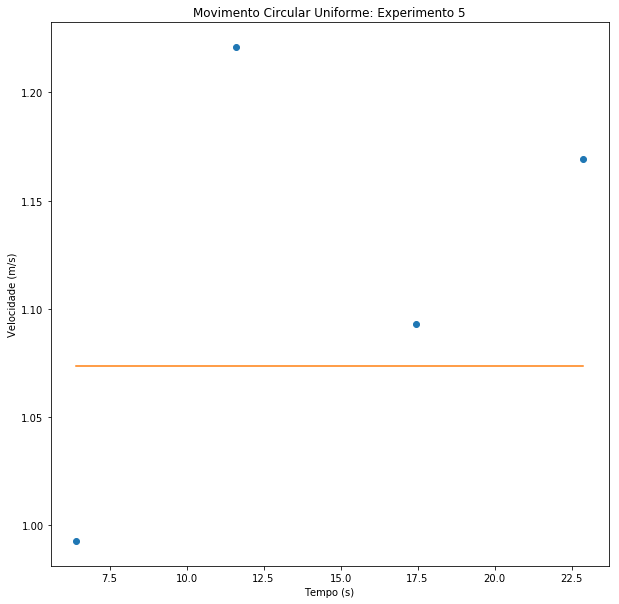

In [9]:
for i, exp in enumerate(experiments):
    v = []
    for j in range(len(exp) - 1):
        v.append((radius * np.pi/2)/(exp[j + 1] - exp[j]))
    t = np.array(exp)
    mean = calc_angular_vel(exp)
    prepara_figura("Movimento Circular Uniforme: Experimento {}".format(i + 1) , 'Tempo (s)', 'Velocidade (m/s)')
    plt.plot(exp[1:], v, 'o')
    plt.plot(exp[1:], radius * mean * np.ones(4))

In [20]:
def euler_circ(w, r, cromer=False):
    x = [np.array([r, 0])]
    v = [np.array([0, r * w])]
    t = [0]
    
    eps = 0.05
    while(t[-1] < exp[-1]):
        nv = v[-1] - w * w * eps * x[-1]
        if cromer : v.append(nv)
        x.append(x[-1] + eps * v[-1])
        if not cromer: v.append(nv)
        t.append(t[-1] + eps)
    v = np.array(v)
    x = np.array(x)
    t = np.array(t)
    return t, x, v

def measured_positions(t, x, exp):
    measured = []
    for m_t in exp:
        idx = np.searchsorted(t, m_t)
        measured.append(x[idx])
    return np.array(measured)

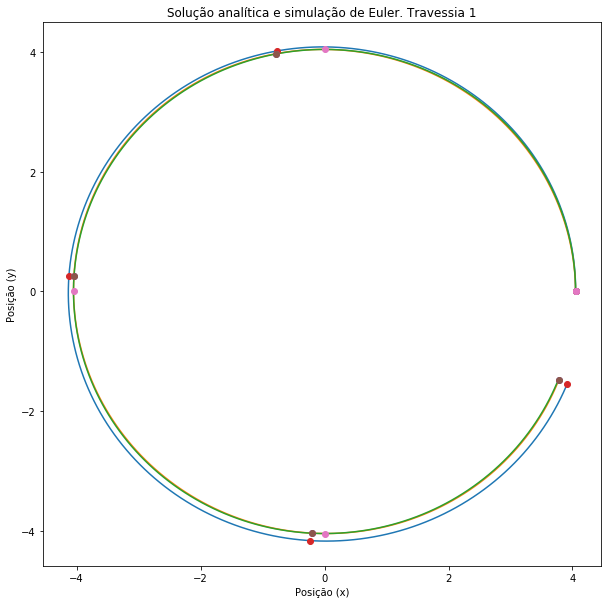

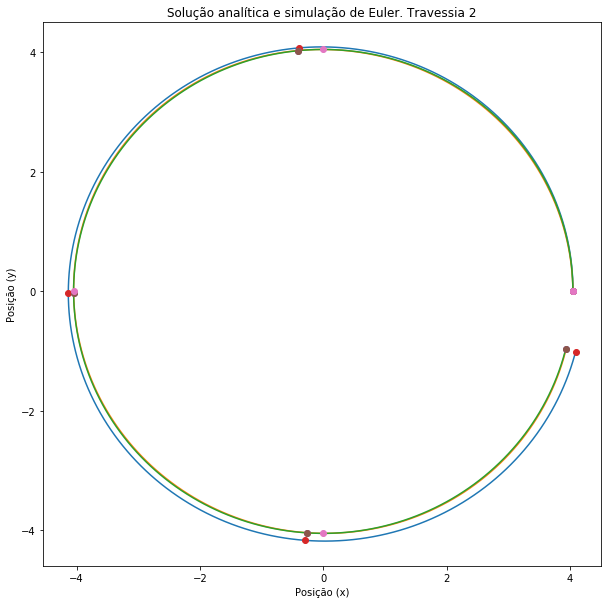

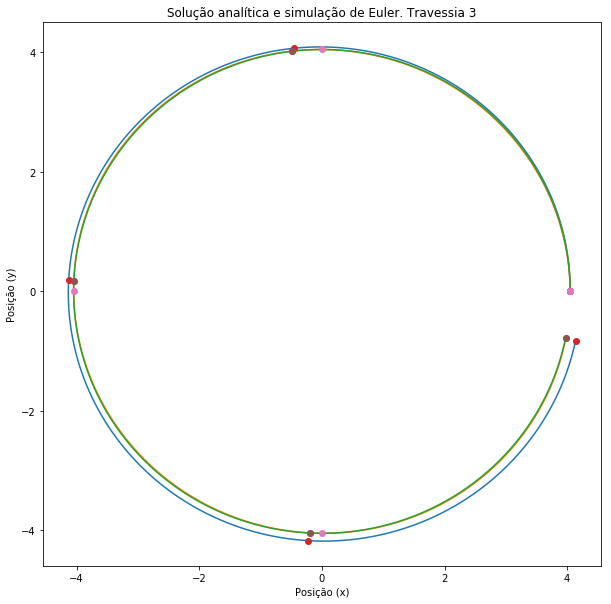

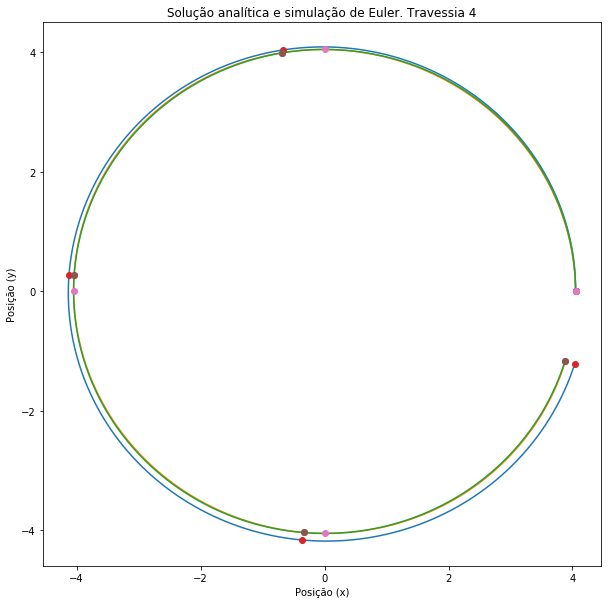

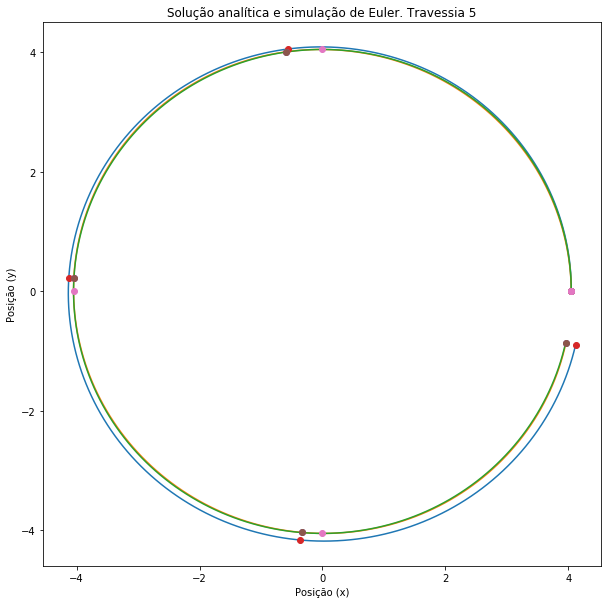

In [42]:
for i, exp in enumerate(experiments):
    w = calc_angular_vel(exp)
    
    prepara_figura("Solução analítica e simulação de Euler. Travessia {}".format(i + 1), 'Posição (x)', 'Posição (y)')
    
    t, x, v = euler_circ(w, radius)
    euler_measured = measured_positions(t, x, exp)
    plt.plot(x.T[0], x.T[1])
    
    t, x, v = euler_circ(w, radius, cromer = True)
    cromer_measured = measured_positions(t, x, exp)
    plt.plot(x.T[0], x.T[1])
    
    plt.plot(radius * np.cos(w * t), radius * np.sin(w * t))
    analitic_measured = measured_positions(t, x, exp)
    
    control_t = np.linspace(0, 2 * np.pi, 5)
    x = []
    x.append(radius * np.cos(control_t))
    x.append(radius * np.sin(control_t))
    x = np.array(x)
    plt.plot(euler_measured.T[0], euler_measured.T[1], 'o')
    plt.plot(cromer_measured.T[0], cromer_measured.T[1], 'o')
    plt.plot(analitic_measured.T[0], analitic_measured.T[1], 'o')
    plt.plot(x[0], x[1], 'o')

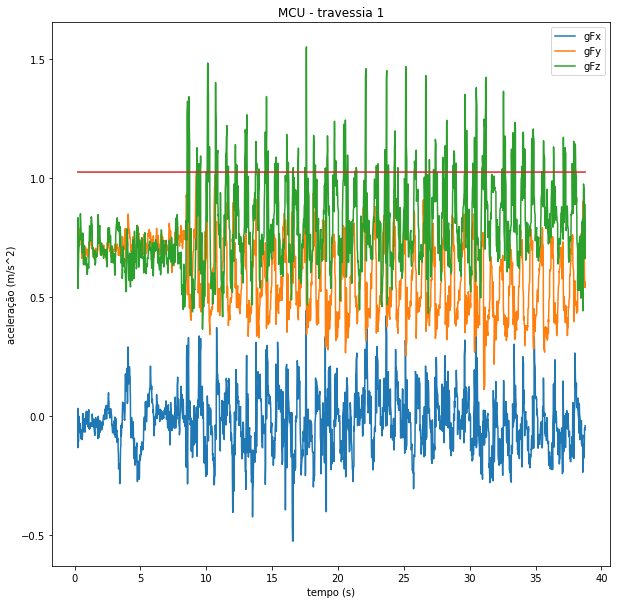

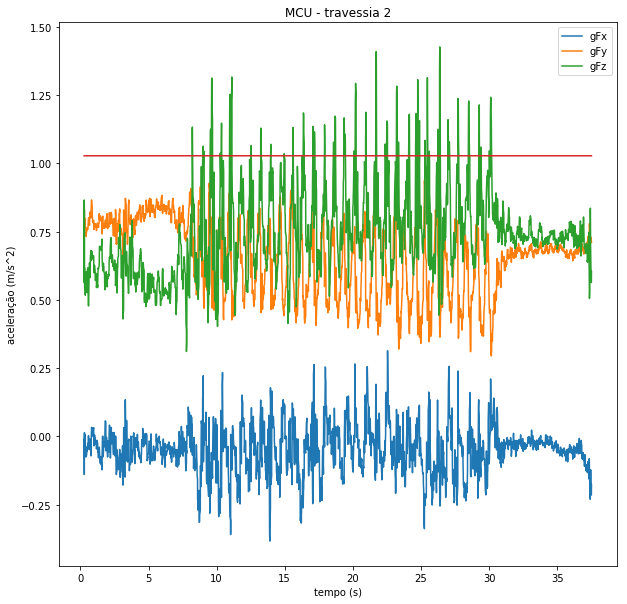

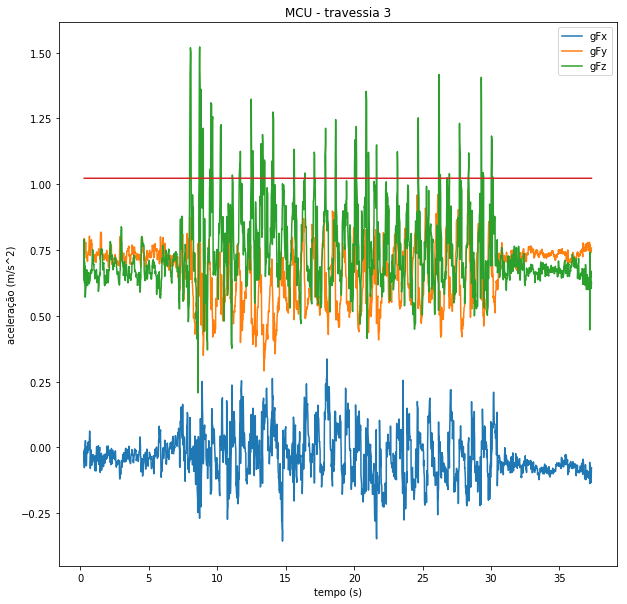

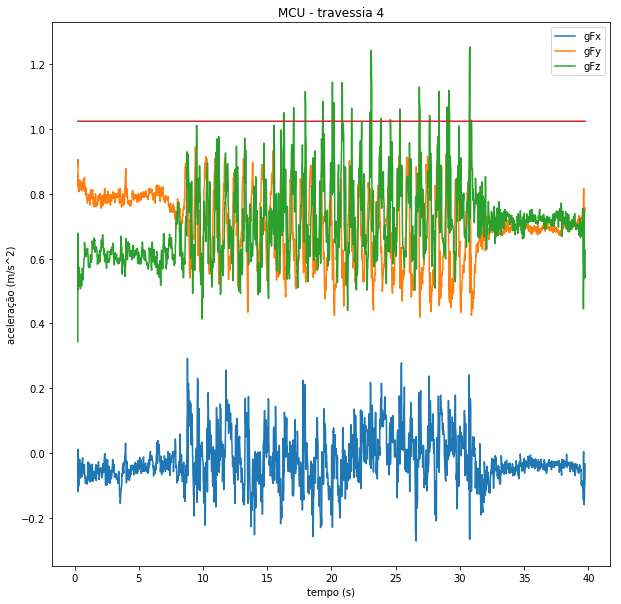

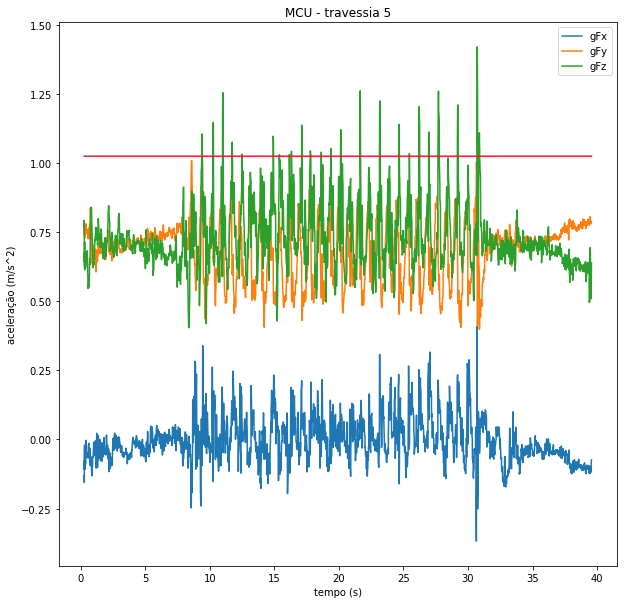

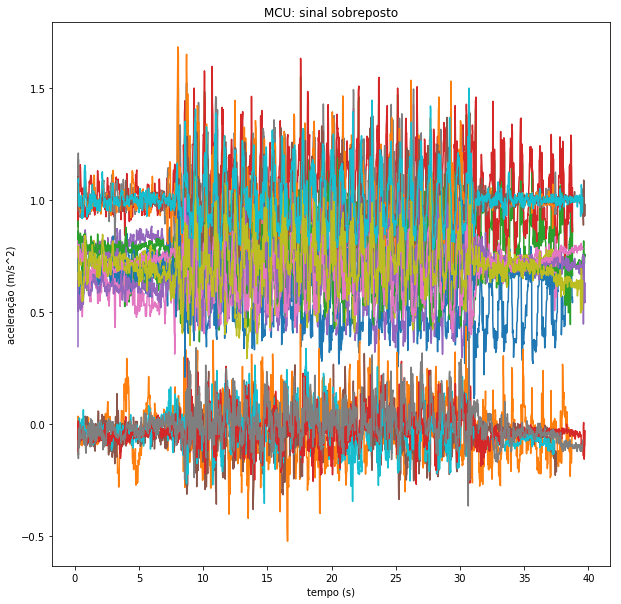

In [12]:
arquivos_acel = ["data/MCU/MCU1.csv", "data/MCU/MCU2.csv", "data/MCU/MCU3.csv", 
                 "data/MCU/MCU4.csv", "data/MCU/MCU5.csv"]
for i in range(5):
    mostra_ac(pd.read_csv(arquivos_acel[i], sep= ","), "MCU - travessia {}".format(i+1))
    
plota_sobreposto("MCU: sinal sobreposto", arquivos_acel)

### Movimento Uniformemente Variado

Nos conjuntos de gráficos a seguir, exibimos os resultados das cinco travessias do movimento uniformemente variado, com  cronômetros nas posições 5, 10, 15, 20. Para cada travessia, exibimos os dados obtidos a partir do acelerômetro do celular e, na sequência, um gráfico comparando os dados dos cronômetros com os dados analíticos. Os dados experimentais são representados por pequenos círculos nas posições correspondentes às de cada cronômetro. Na linha tracejada, exibimos o comportamento esperado do movimento uniformemente variado, obtido de forma analítica.

Módulo do erro máximo - x(t): 0.4350000000000005
Módulo do erro máximo - x(t): 0.9591439303112237
Módulo do erro máximo - x(t): 0.30793072687562706
Módulo do erro máximo - x(t): 0.16848489248198995
Módulo do erro máximo - x(t): 0.10972844901180956


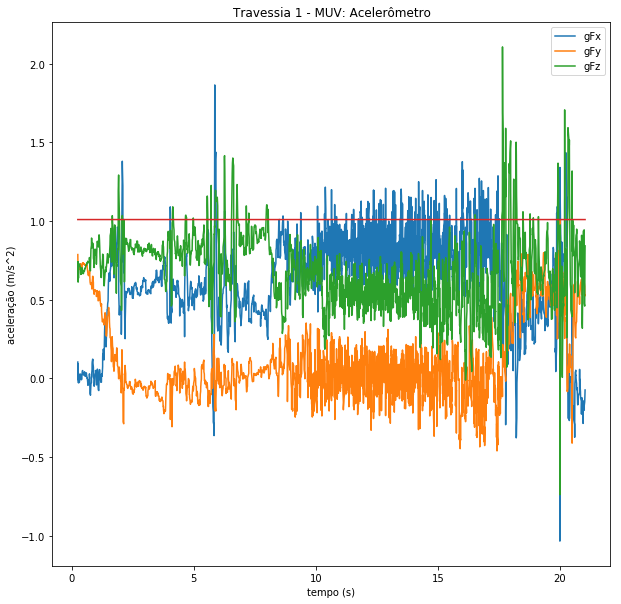

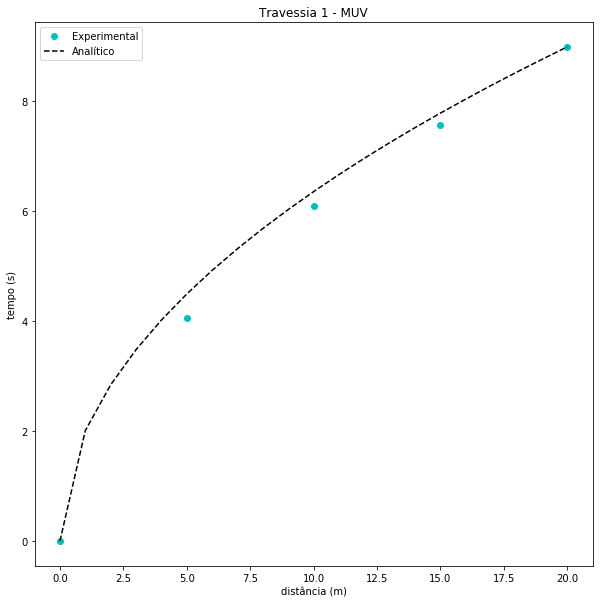

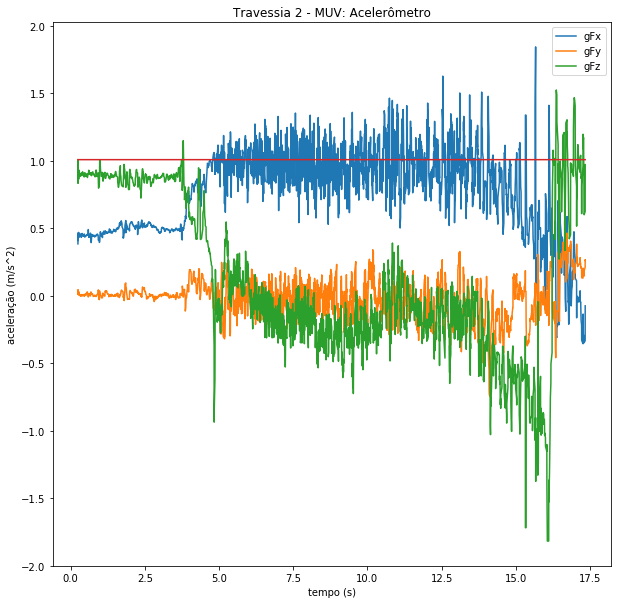

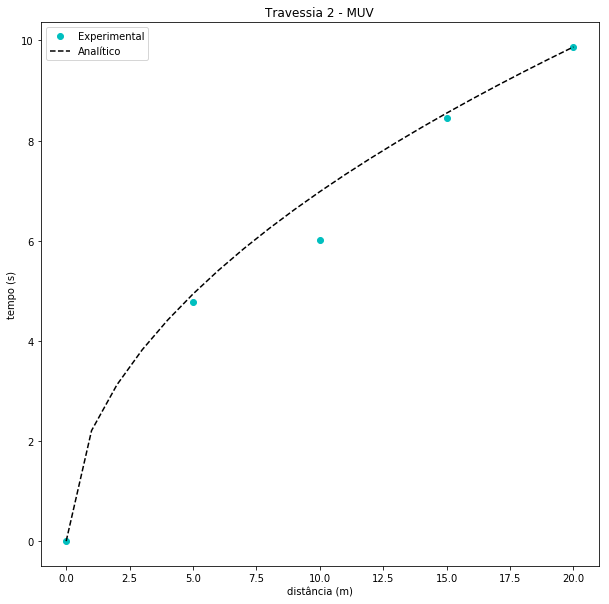

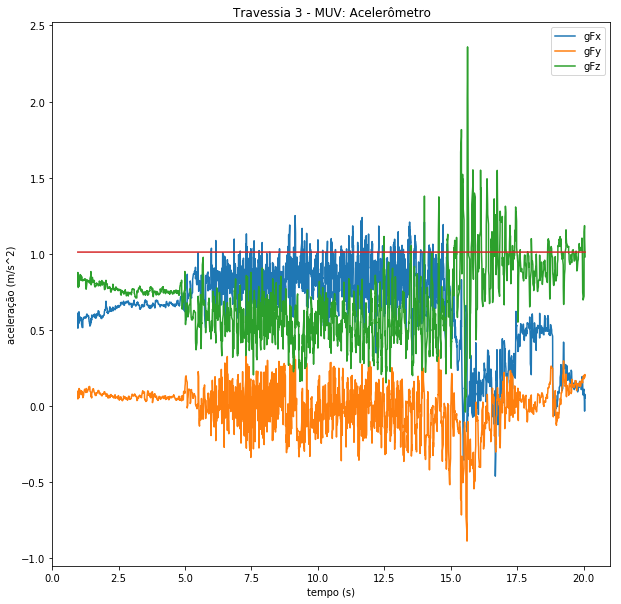

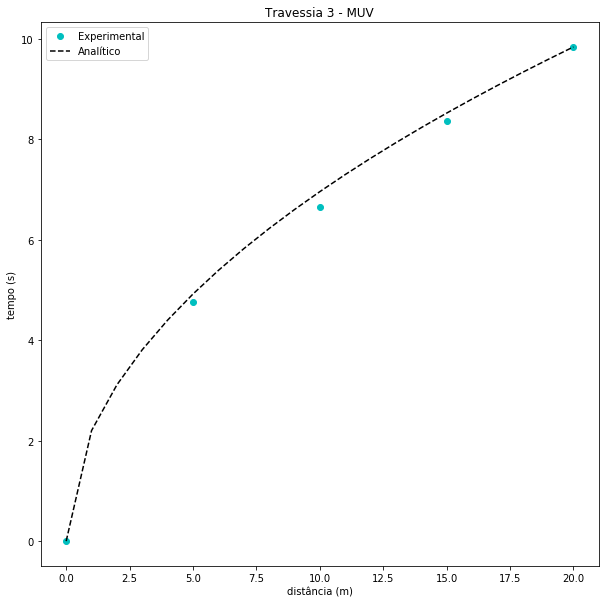

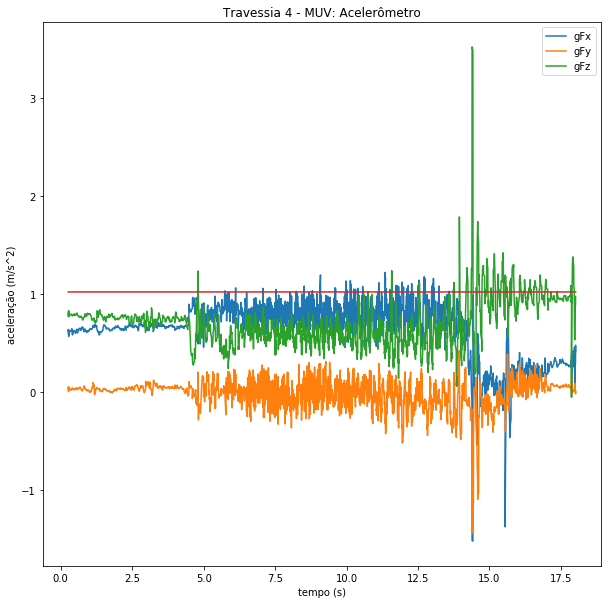

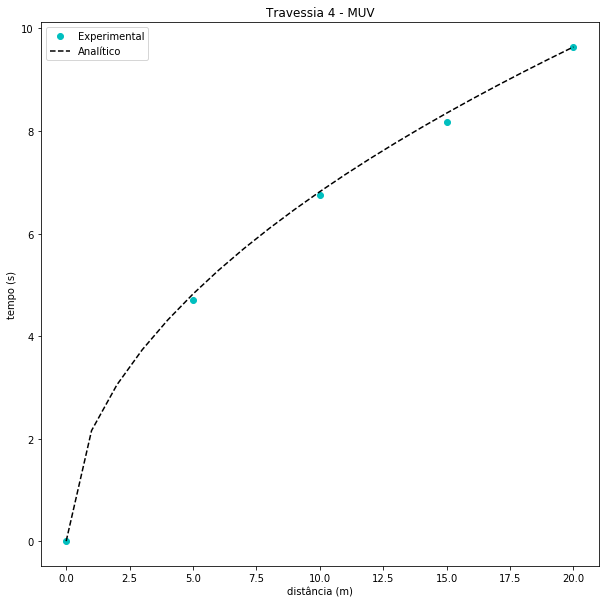

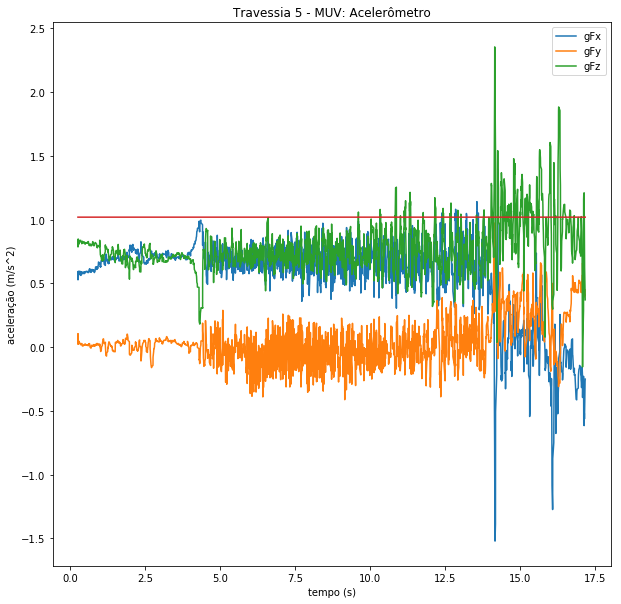

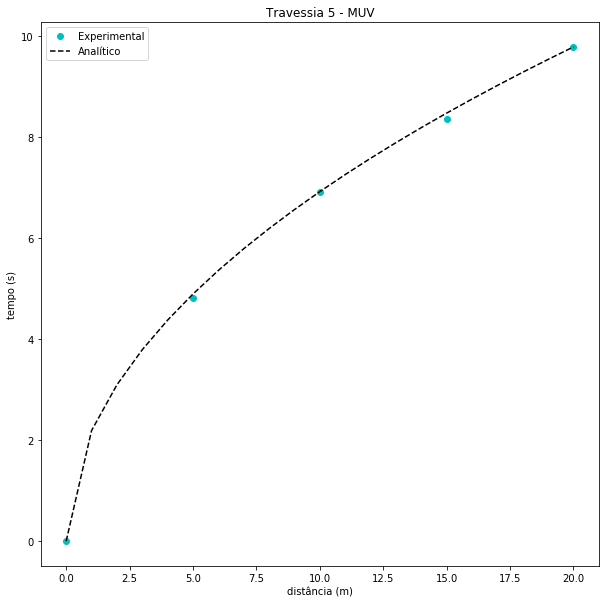

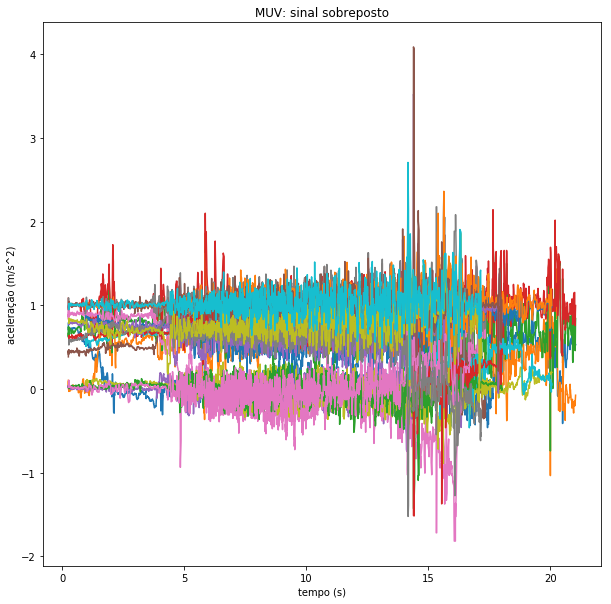

In [13]:
arquivos_acel = ["data/MUV/MUV1.csv", "data/MUV/MUV2.csv", "data/MUV/MUV3.csv", "data/MUV/MUV4.csv", 
                 "data/MUV/MUV5.csv"]
# gráficos x(t) x t
plota_muv("data/MUV/MUV.csv", [pd.read_csv(arq) for arq in arquivos_acel])
plota_sobreposto("MUV: sinal sobreposto", arquivos_acel)

Módulo do erro máximo (aceleração): 0.09377122172361319
Módulo do erro máximo - v(t): 0.25531159499537504
Módulo do erro máximo (aceleração): 0.10228599795402754
Módulo do erro máximo - v(t): 0.7309370790748972
Módulo do erro máximo (aceleração): 0.09977848394441624
Módulo do erro máximo - v(t): 0.4648342623548931
Módulo do erro máximo (aceleração): 0.0824590108736924
Módulo do erro máximo - v(t): 0.4016526112112939
Módulo do erro máximo (aceleração): 0.09469405317448454
Módulo do erro máximo - v(t): 0.43944589328833317


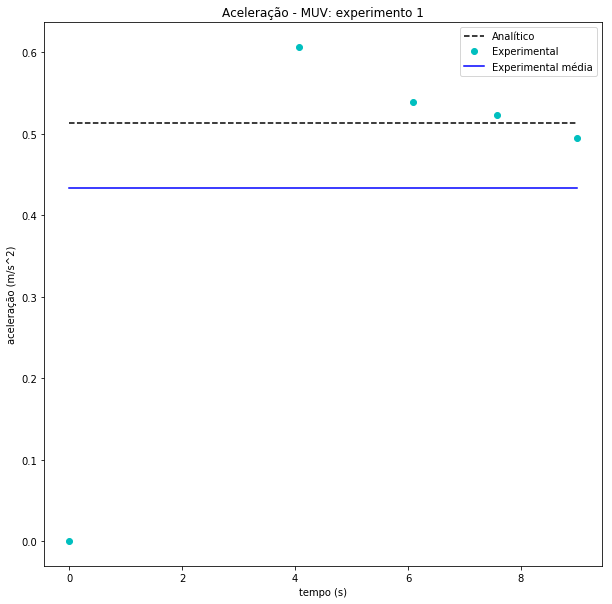

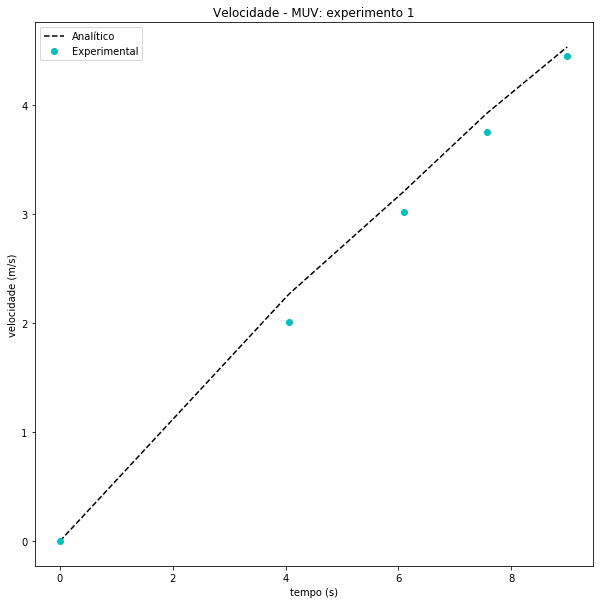

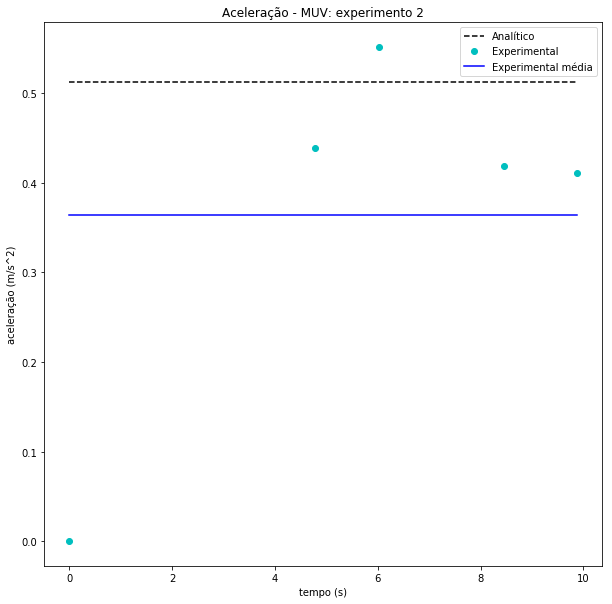

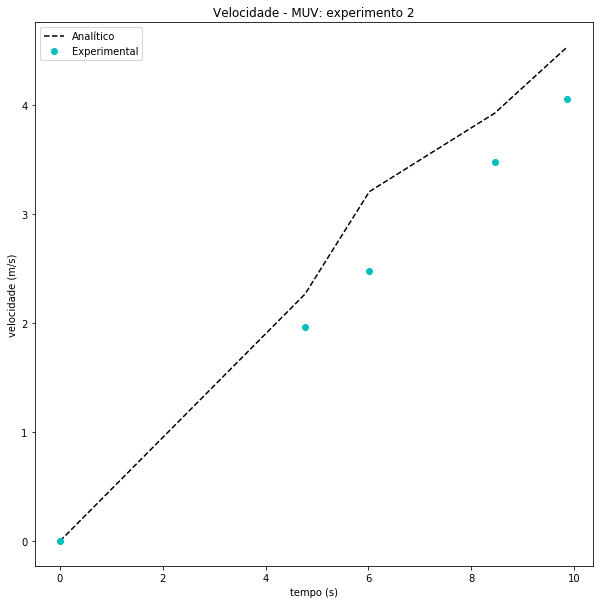

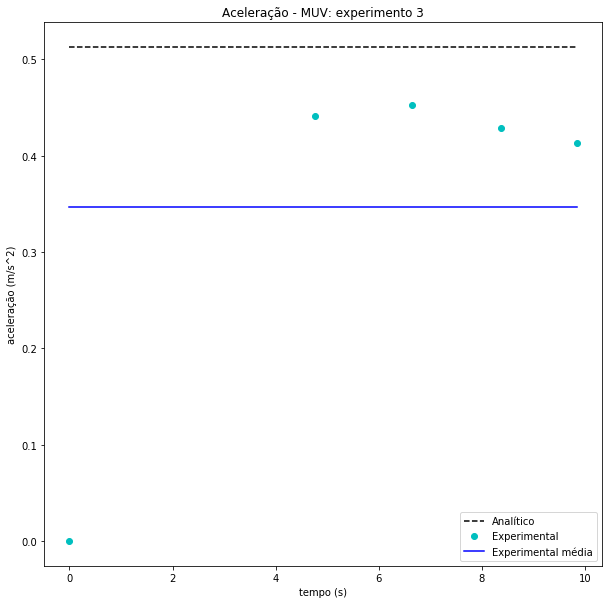

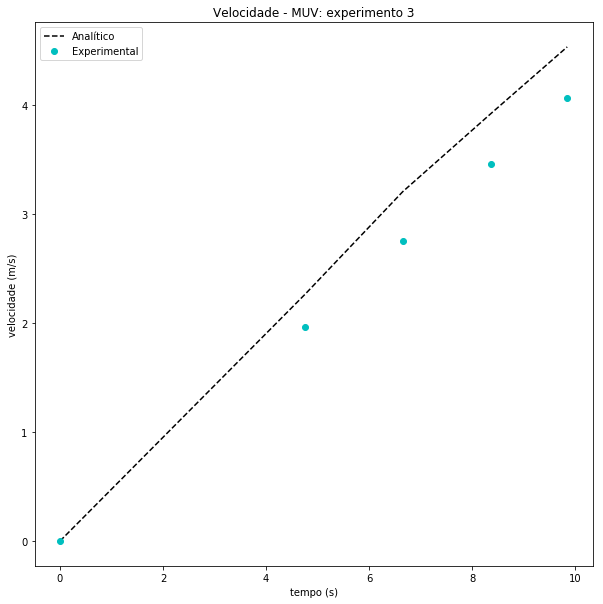

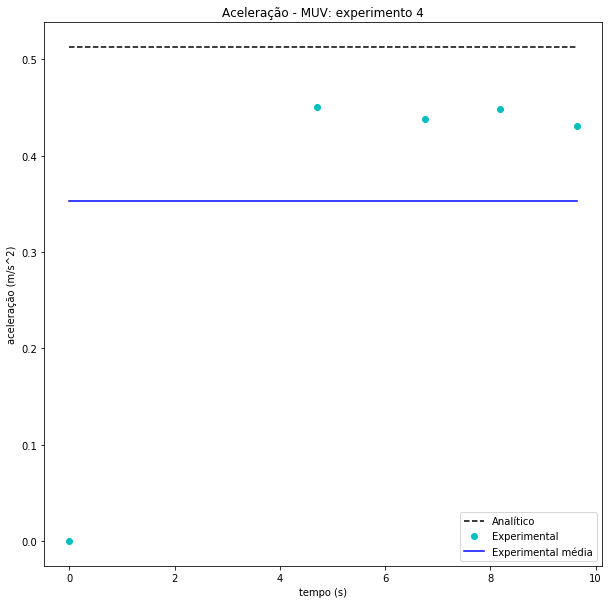

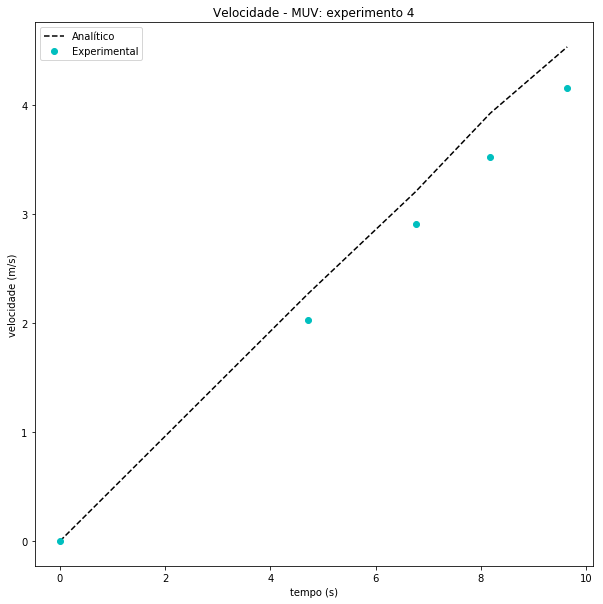

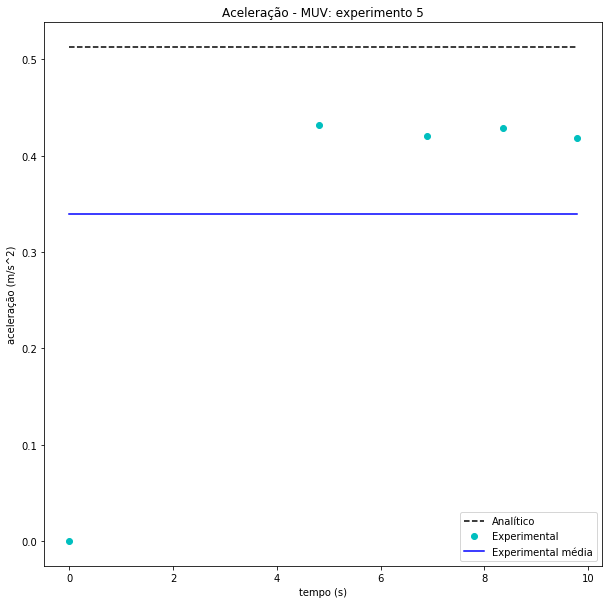

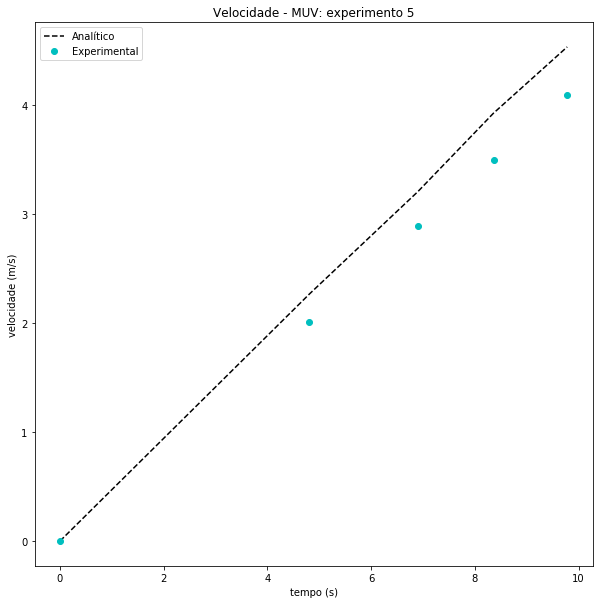

In [14]:
# aceleração téorica
dv_dt = 9.8*math.sin(math.radians(3))
tempo = ler_cron("data/MUV/MUV.csv")

# aceleração e velocidade
for i in range(5):
    dv_dt_experim = calcula_acel(i, tempo)
    plota_acel(dv_dt, dv_dt_experim, i, tempo)
    erro1 = [abs(x  - y) for x, y in zip(dv_dt_experim, [dv_dt for i in range(5)])]
    print("Módulo do erro máximo (aceleração):", max(erro1[1:]))
    vel_experim = calcula_vel(dv_dt, i, tempo)
    plota_vel(vel_experim, i, tempo)

### Movimento Oscilatório

Nos conjuntos de gráficos a seguir, exibimos os resultados das cinco realizações do movimento oscilatório, conforme descrito na seção anterior. Os dados experimentais são representados por pequenos círculos nas posições correspondentes às de cada cronômetro. No gráfico de cada travessia, apresentamos, também, na linha tracejada, o comportamento esperado do movimento oscilatório, obtido de forma analítica. Na sequência, abaixo de cada gráfico, estão os dados obtidos a partir do acelerômetro do celular.

Periodo do Experimento #1: 0.07424999999999993s
Periodo do Experimento #2: 0.0129999999999999s
Periodo do Experimento #3: 0.09808000000000014s
Periodo do Experimento #4: 0.019199999999999662s
Periodo do Experimento #5: 0.13435593220338976s


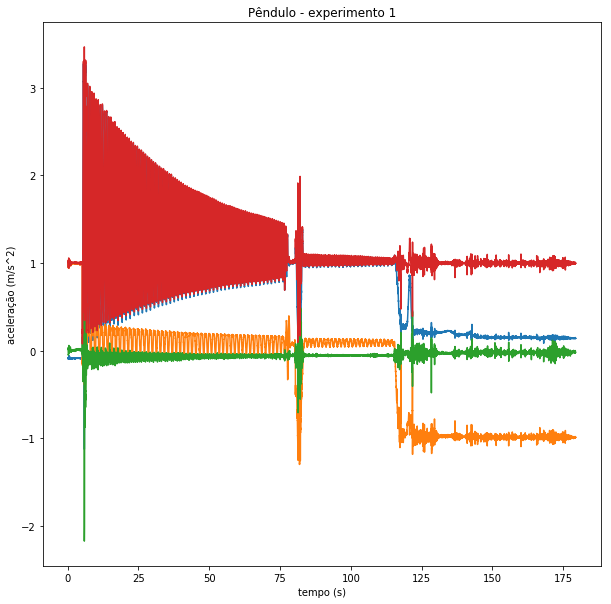

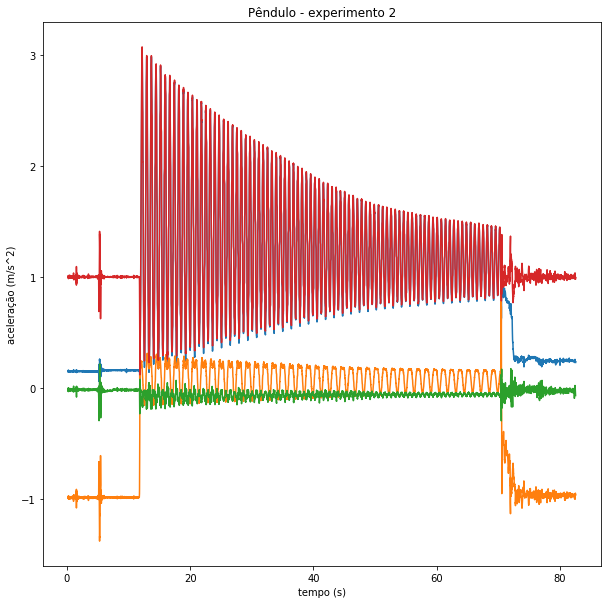

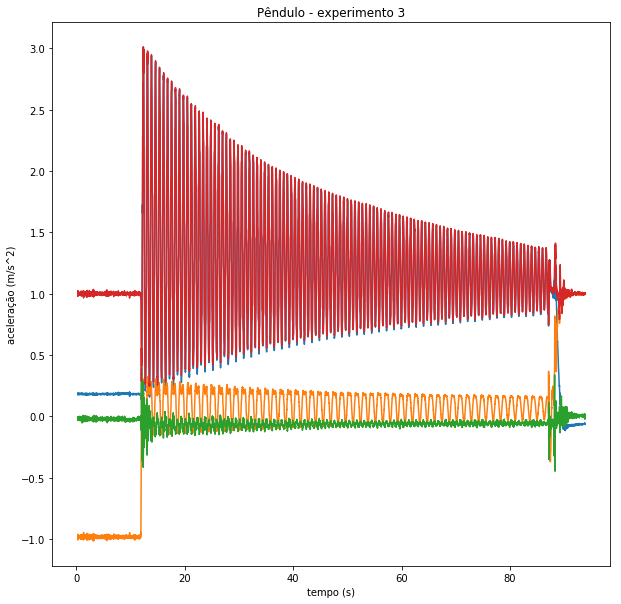

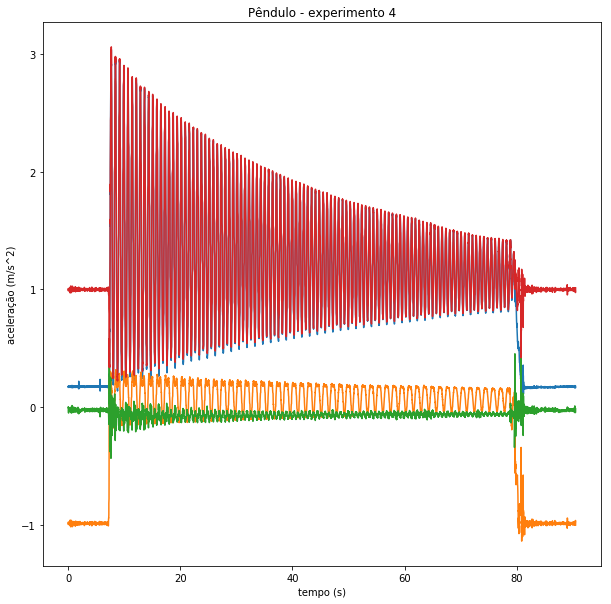

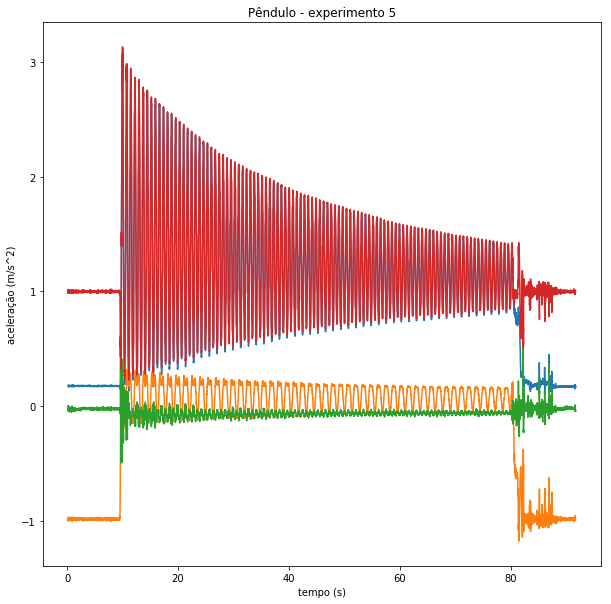

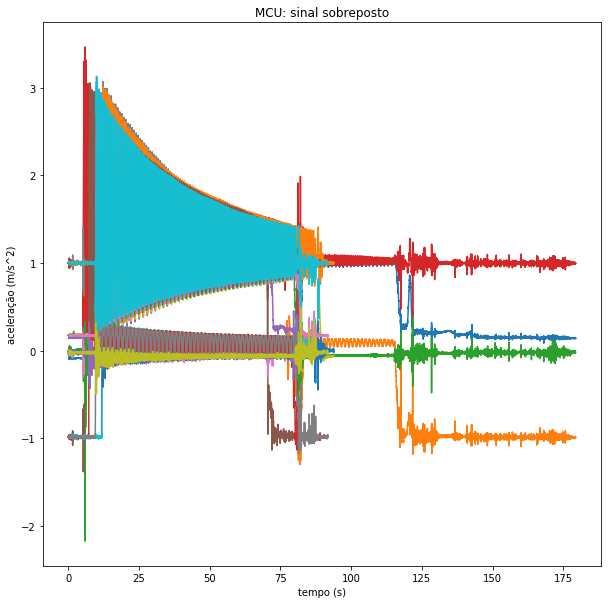

In [15]:
arquivos_acel = ["data/pendulo/pendulo1.csv", "data/pendulo/pendulo2.csv", "data/pendulo/pendulo3.csv", 
                 "data/pendulo/pendulo4.csv", "data/pendulo/pendulo5.csv"]
for i in range(5):
    periodo = gets_period(pd.read_csv(arquivos_acel[i], sep= ","))
    print("Periodo do Experimento #{}: {}s".format(i+1, periodo))
    plota_set("Pêndulo - experimento {}".format(i+1), pd.read_csv(arquivos_acel[i], sep= ","))
    
plota_sobreposto("MCU: sinal sobreposto", arquivos_acel)

## Análise

Nos experimentos realizados para o Movimento Uniformemente Variado, o erro entre a modelagem numérica a partir do modelo físico e os dados experimentais foi satisfatório com valor absoluto máximo de aproximadamente 0.96 metros para a velocidade, 0.10 $m/s^2$ para a velocidade e 0.73 m/s para a velocidade. O valor máximo de todos os erros ocorreu na simulação referente ao mesmo experimento, a segunda tomada, com as simulações sem atrito.

Explicar o que diabos aconteceu no gráfico do pêndulo 1 (foi o que bateu na madeira do outro lado, talvez seja isso).

## Análise crítica e interpretação

### Movimento Circular Uniforme


### Movimento Uniformemente Variado

Ao analisar os dados obtidos com os cinco experimentos realizados sobre o Movimento Uniformemente Variado e comparar com os resultados obtidos a partir das equações da física newtoniana, é possivel observar que o movimento real executado em muito assemelhou-se ao resultado teórico para o nível de detalhamento desejado.

As discrepâncias observadas em alguns pontos, como aos 10 metros da travessia 2, podem ser atribuídas a erros experimentais, como o tempo de reação dos alunos operando os cronômetros, o atrito e a inclinação não uniforme da rampa, entre outros. Entretanto, o erro absoluto nunca fui superior a um segundo, o que, considerando o experimento como um todo, as limitações do metodo e dos aparatos usados, pode ser considerado esperado.

No geral, o método adotado, com o uso de cronômetros e de um skate, aproveitando-se da aceleração da gravidade em plano inclinado, mostrou-se apropriado para a realização de um movimento uniformemente variado. Reciprocamente, o modelo matemático implementado, que soluciona algoritmicamente as equações $ S = S_0 + v_0t + \frac{\alpha t^2}{2} $ e $v = v_0 + \alpha t$ refletiu satisfatoriamente os fenômenos do mundo real na escala desejada.

### Movimento Oscilatório

## Contribuição dos autores

No experimento de Movimento Circular Uniforme, Bruna realizou o movimento com o celular equipado com o Physics Toolbox. Erica garantiu a manutenção do raio uniforme atuando como centro do compasso de barbante, além de realizar a gravação, e Eduardo e Guilherme operaram cronômetros.

No experimento de Movimento Uniformemente Variado, Erica realizou a travessia no skate com o celular equipado com o Physics Toolbox. Bruna realizou a filmagem e Eduardo e Guilherme operaram cronômetros.

No experimento de Movimento Oscilatório, Bruna, Eduardo, Erica e Guilherme trabalharam em conjunto na fixação do pêndulo na lixeira e do celular no pêndulo e revezaram-se na tarefa de gravação e de liberação do pêndulo.

Bruna e +++ redigiu o relatório; Bruna, Guilherme e +++ realizaram as simulações e Erica editou o vídeo.

Todos os autores leram e aprovaram a versão final deste relatório.

## Vídeo dos experimentos

[Link para o vídeo no YouTube](https://www.youtube.com/watch?v=ekFRp_ukFtw&feature=youtu.be)